# Imports

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
# Load the cleaned GitHub repositories dataset
df = pd.read_csv('../dados/github_repos_limpo.csv')
df.head(2)  # Display the first two rows of the dataset

,name,owner,stars,forks,language,created_at,updated_at,size_kb,open_issues,owner_type,owner_public_repos,subscribers_count,last_year_commits,contributors,closed_issues,pull_requests
0,free-programming-books,EbookFoundation,359735,63576,Python,2013-10-11 06:50:37+00:00,2025-06-21 02:09:07+00:00,19483,45,Organization,37,5000,339,432,129,15
1,public-apis,public-apis,351991,37004,Python,2016-03-20 23:49:42+00:00,2025-06-21 02:06:40+00:00,4771,492,Organization,1,4316,5,427,159,490


# Exploratory Data Analysis

## Category Data Frequency

In [66]:
# Identify all categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns

['name', 'owner', 'language', 'created_at', 'updated_at', 'owner_type']

In [67]:
# Display the frequency of each unique value for all categorical columns
for col in categorical_columns:
    print(f'{col}')
    print(df[col].value_counts())
    print('\n')

# Owner type, owner, and language are the key categorical columns

name
name
linux        12
scrcpy       11
FFmpeg       11
curl         11
android      10
             ..
masscan       1
TDengine      1
Tasmota       1
hashcat       1
ijkplayer     1
Name: count, Length: 8772, dtype: int64


owner
owner
google           72
apache           63
microsoft        60
alibaba          40
rust-lang        23
                 ..
vanhauser-thc     1
redcanaryco       1
darktable-org     1
lz4               1
phpredis          1
Name: count, Length: 6920, dtype: int64


language
language
C             1103
Python        1000
JavaScript    1000
TypeScript    1000
Go            1000
Swift         1000
Rust          1000
Java           999
Kotlin         999
Name: count, dtype: int64


created_at
created_at
2011-04-14 14:12:38+00:00    11
2011-09-04 22:48:12+00:00    11
2017-11-21 18:00:27+00:00    11
2010-03-18 22:32:22+00:00    11
2015-06-23 10:26:27+00:00     7
                             ..
2011-02-15 19:38:23+00:00     1
2020-03-25 16:49:22+00:00     1
201

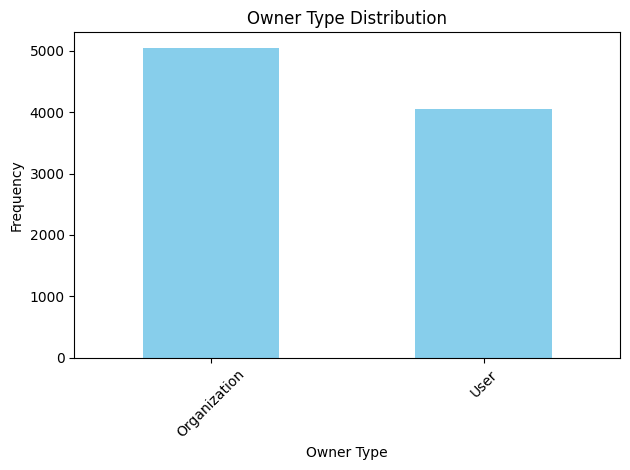

In [68]:
# Plot the distribution of the owner types (User vs. Organization)
df['owner_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Owner Type Distribution')
plt.xlabel('Owner Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

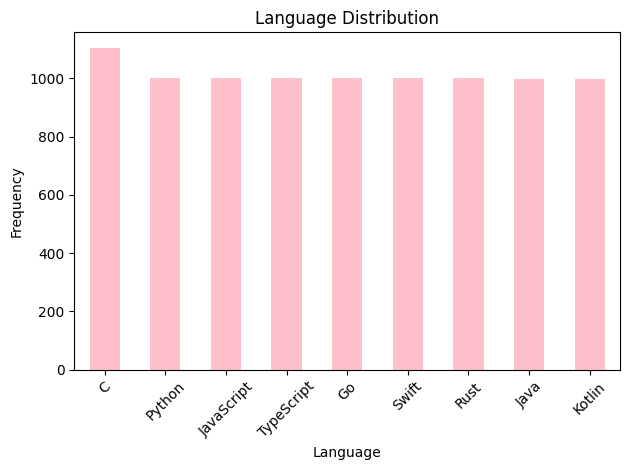

In [69]:
# Plot the distribution of programming languages used in the repositories
df['language'].value_counts().plot(kind='bar', color='pink')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
# Filter the owners where the owner type is 'Organization'
organizations = df[df['owner_type'] == 'Organization']['owner']
organizations.value_counts()

owner
google             72
apache             63
microsoft          60
alibaba            40
android            23
                   ..
capstone-engine     1
neutrinolabs        1
sparklemotion       1
istoreos            1
htop-dev            1
Name: count, Length: 3534, dtype: int64

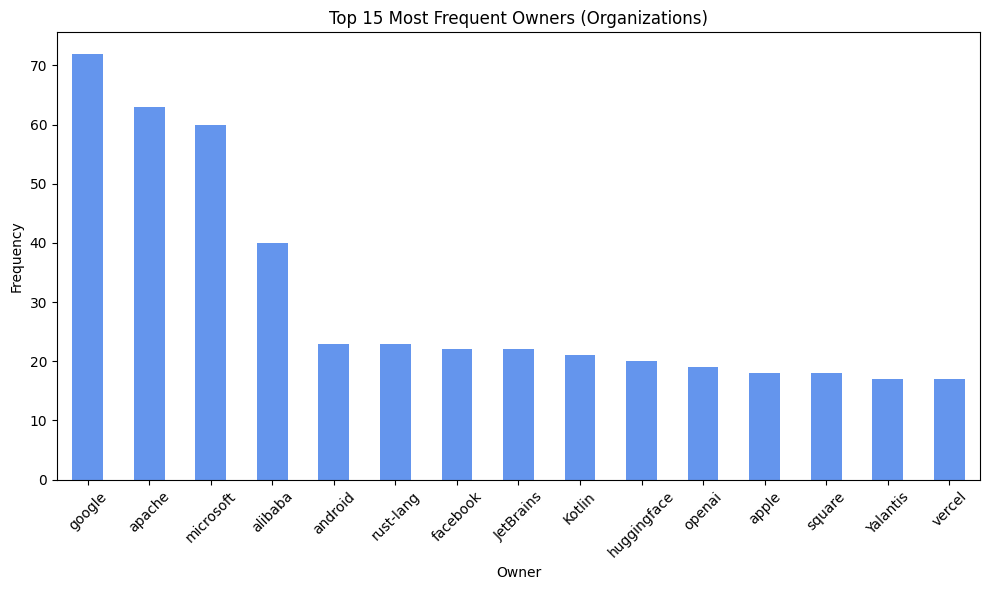

In [71]:
# Plot the top 15 most frequent organization owners
plt.figure(figsize=(10, 6))

organizations.value_counts().head(15).plot(kind='bar', color='cornflowerblue')
plt.title('Top 15 Most Frequent Owners (Organizations)')
plt.xlabel('Owner')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Numerical Data Descriptive Statistics 

In [72]:
# Identify all numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['int64']).columns.to_list()
numerical_columns

['stars',
 'forks',
 'size_kb',
 'open_issues',
 'owner_public_repos',
 'subscribers_count',
 'last_year_commits',
 'contributors',
 'closed_issues',
 'pull_requests']

### Posição


--- stars ---
Mean: 11388.61
Median: 6779.00


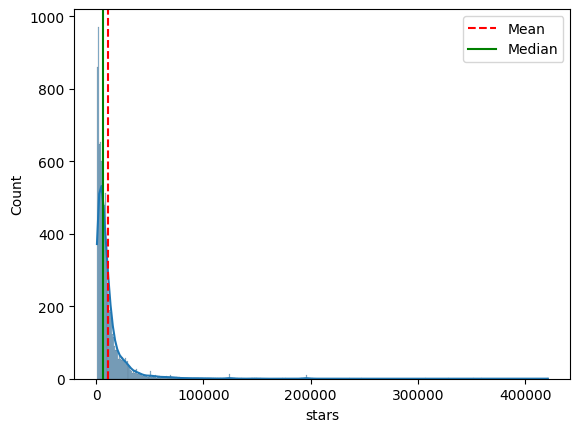


--- forks ---
Mean: 1740.53
Median: 716.00


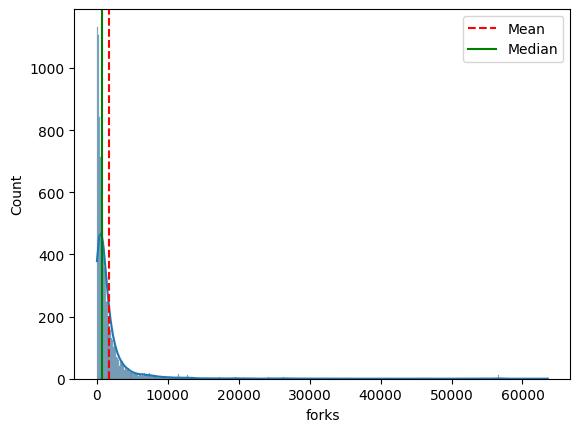


--- size_kb ---
Mean: 123679.48
Median: 14703.00


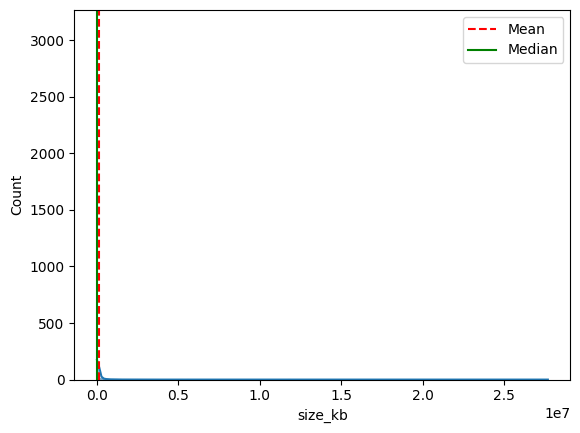


--- open_issues ---
Mean: 222.41
Median: 73.00


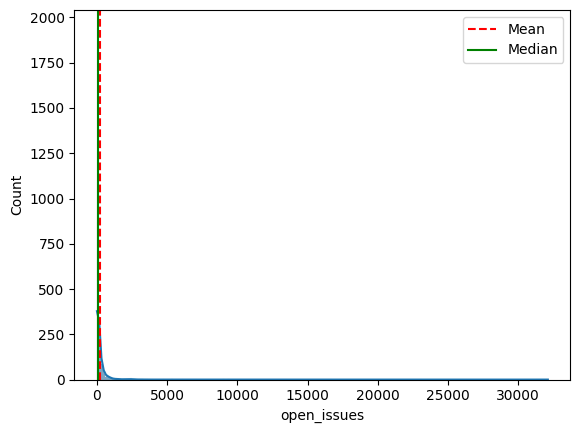


--- owner_public_repos ---
Mean: 174.68
Median: 38.00


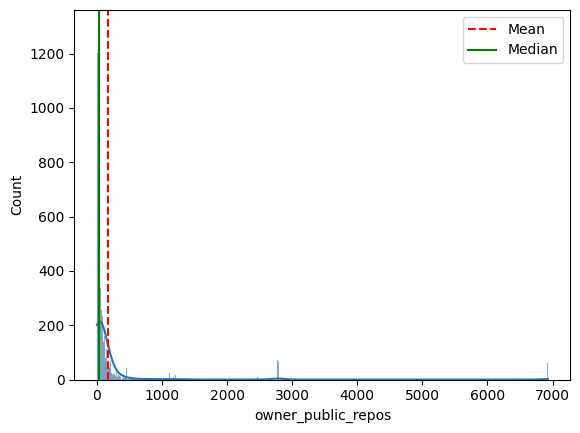


--- subscribers_count ---
Mean: 217.73
Median: 106.00


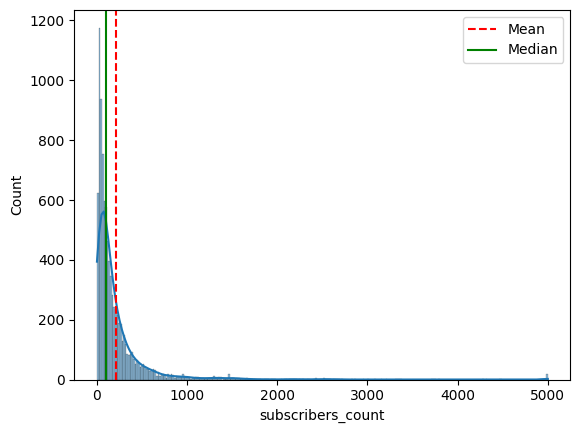


--- last_year_commits ---
Mean: 467.23
Median: 25.00


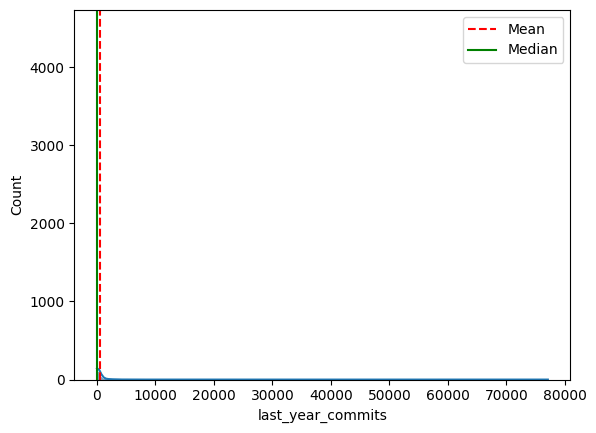


--- contributors ---
Mean: 93.10
Median: 43.00


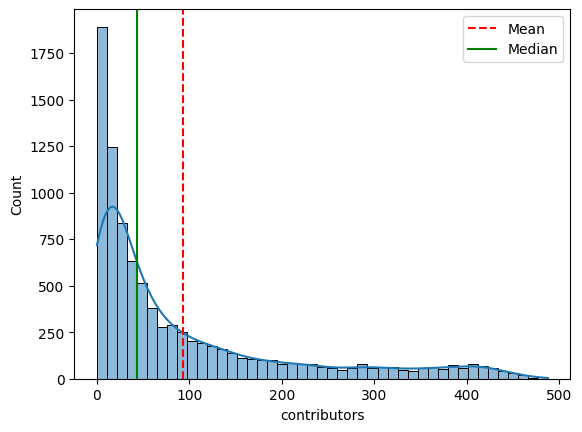


--- closed_issues ---
Mean: 154.76
Median: 13.00


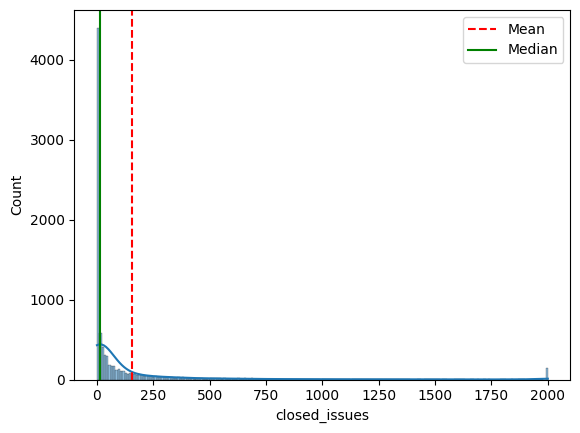


--- pull_requests ---
Mean: 28.68
Median: 8.00


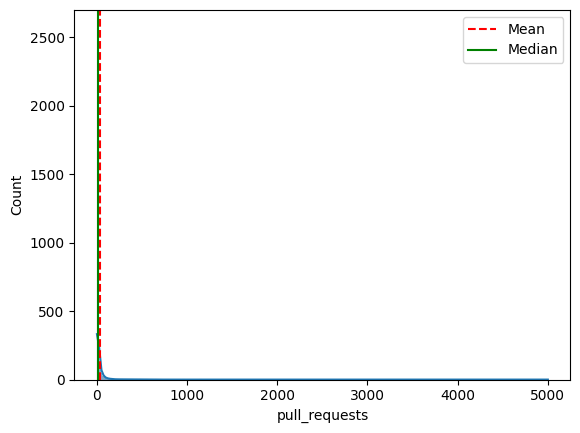

In [73]:
# For each numerical column, calculate and plot the mean and median
for col in numerical_columns:
    print(f"\n--- {col} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    
    # Plot histogram with KDE for distribution
    sns.histplot(df[col], kde=True)
    
    # Add mean and median lines
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='-', label='Median')
    plt.legend()
    plt.show()

### Dispersão


--- stars ---
Standard Deviation: 18230.48
Variance: 332350465.77
Minimum: 773
Maximum: 421248
Range: 420475
1st Quartile (Q1): 3146.0
3rd Quartile (Q3): 12459.0
IQR (Interquartile Range): 9313.0


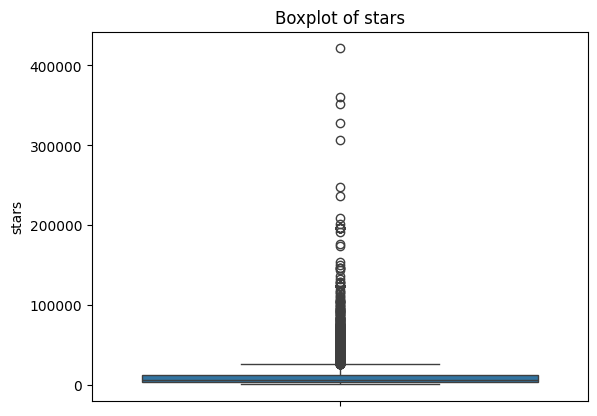


--- forks ---
Standard Deviation: 4020.16
Variance: 16161684.11
Minimum: 4
Maximum: 63576
Range: 63572
1st Quartile (Q1): 279.0
3rd Quartile (Q3): 1693.0
IQR (Interquartile Range): 1414.0


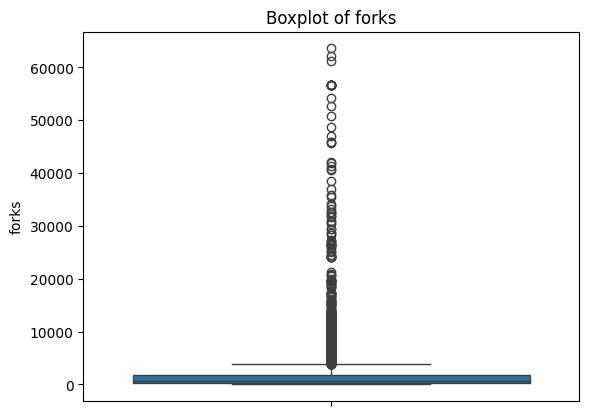


--- size_kb ---
Standard Deviation: 634567.11
Variance: 402675417747.30
Minimum: 0
Maximum: 27683251
Range: 27683251
1st Quartile (Q1): 3490.0
3rd Quartile (Q3): 66308.0
IQR (Interquartile Range): 62818.0


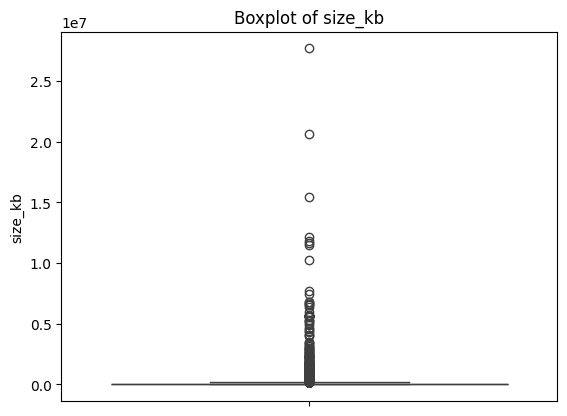


--- open_issues ---
Standard Deviation: 650.72
Variance: 423431.47
Minimum: 0
Maximum: 32117
Range: 32117
1st Quartile (Q1): 23.0
3rd Quartile (Q3): 213.0
IQR (Interquartile Range): 190.0


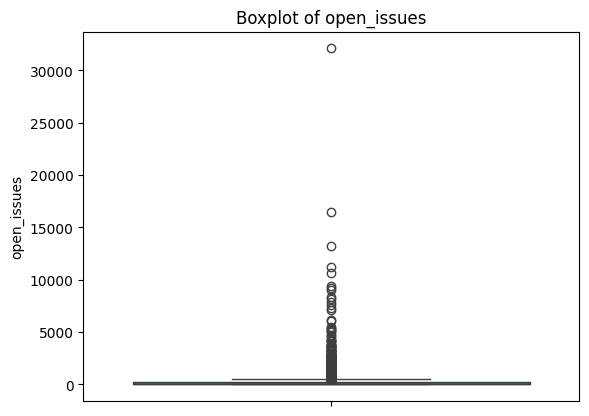


--- owner_public_repos ---
Standard Deviation: 666.16
Variance: 443770.43
Minimum: 0
Maximum: 6928
Range: 6928
1st Quartile (Q1): 14.0
3rd Quartile (Q3): 95.0
IQR (Interquartile Range): 81.0


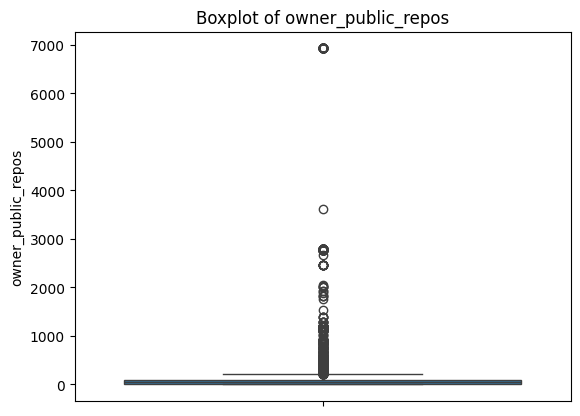


--- subscribers_count ---
Standard Deviation: 394.28
Variance: 155457.65
Minimum: 1
Maximum: 5000
Range: 4999
1st Quartile (Q1): 46.0
3rd Quartile (Q3): 236.0
IQR (Interquartile Range): 190.0


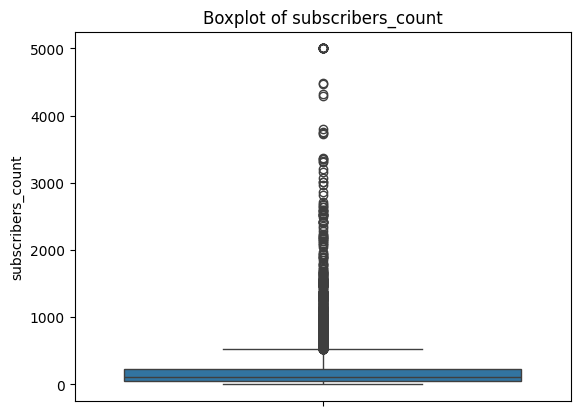


--- last_year_commits ---
Standard Deviation: 3012.70
Variance: 9076376.42
Minimum: 0
Maximum: 77090
Range: 77090
1st Quartile (Q1): 0.0
3rd Quartile (Q3): 241.0
IQR (Interquartile Range): 241.0


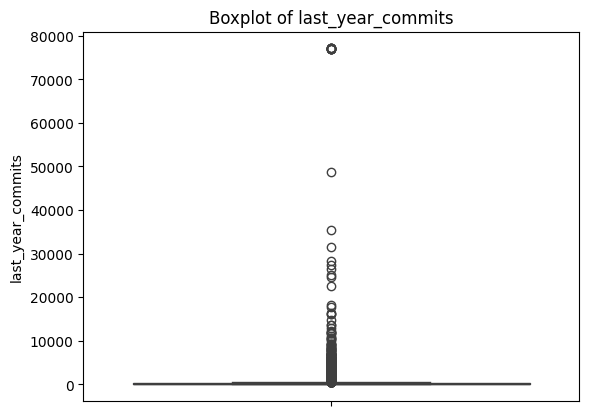


--- contributors ---
Standard Deviation: 114.49
Variance: 13107.44
Minimum: 0
Maximum: 488
Range: 488
1st Quartile (Q1): 13.0
3rd Quartile (Q3): 128.0
IQR (Interquartile Range): 115.0


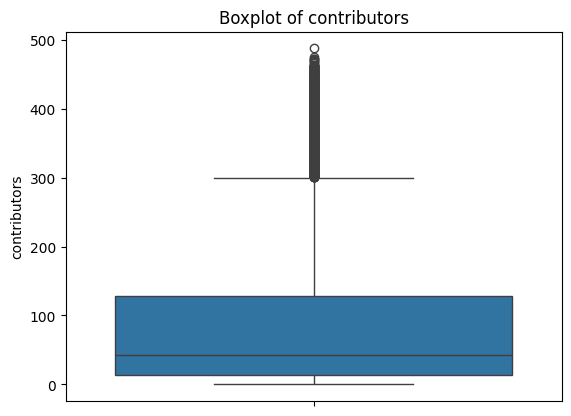


--- closed_issues ---
Standard Deviation: 363.74
Variance: 132309.30
Minimum: 0
Maximum: 2000
Range: 2000
1st Quartile (Q1): 1.0
3rd Quartile (Q3): 108.0
IQR (Interquartile Range): 107.0


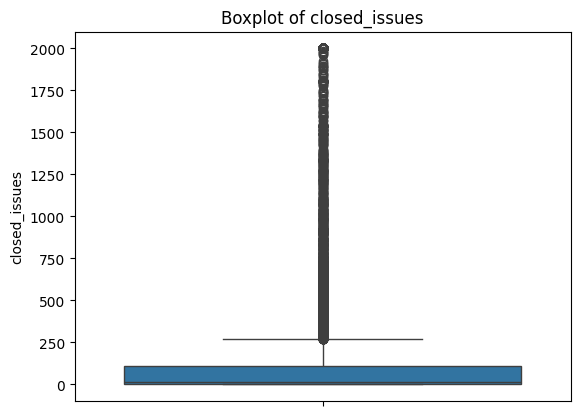


--- pull_requests ---
Standard Deviation: 93.41
Variance: 8725.21
Minimum: 0
Maximum: 5000
Range: 5000
1st Quartile (Q1): 2.0
3rd Quartile (Q3): 24.0
IQR (Interquartile Range): 22.0


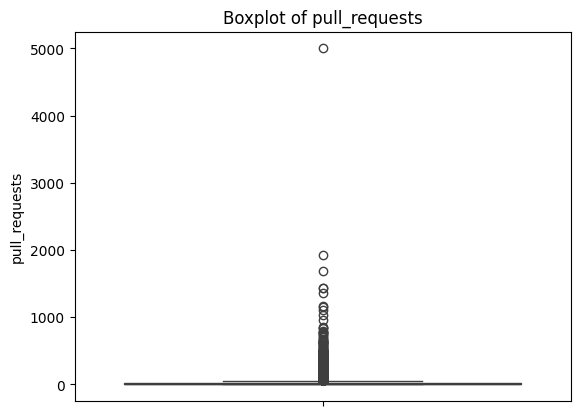

In [74]:
# For each numerical column, calculate dispersion statistics and plot boxplots
for col in numerical_columns:
    print(f"\n--- {col} ---")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Minimum: {df[col].min()}")
    print(f"Maximum: {df[col].max()}")
    print(f"Range: {df[col].max() - df[col].min()}")
    print(f"1st Quartile (Q1): {df[col].quantile(0.25)}")
    print(f"3rd Quartile (Q3): {df[col].quantile(0.75)}")
    print(f"IQR (Interquartile Range): {df[col].quantile(0.75) - df[col].quantile(0.25)}")
    
    # Plot boxplot to visualize spread and detect outliers
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()